Forecasting COVID cases country wise and globally:

In [1]:
pwd

'C:\\Users\\vinit'

In [1]:
import pandas as pd
df = pd.read_excel(r'Downloads/CovidData.xlsx')
df.head(4)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [12]:
#df['new_cases_smoothed'].fillna(0, inplace=True)
#df
#df = df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' else x.fillna(''))
#df
df['tests_units']

0                      0
1                      0
2                      0
3                      0
4                      0
              ...       
85166    tests performed
85167    tests performed
85168    tests performed
85169                  0
85170                  0
Name: tests_units, Length: 85171, dtype: object

In [3]:
df.shape

(85171, 59)

In [4]:
#checking the location count
df['location'].value_counts()

Argentina       486
Mexico          486
Thailand        483
Peru            481
Taiwan          471
               ... 
Saint Helena     66
Aruba            33
Curacao          33
Tonga            13
Nauru             8
Name: location, Length: 219, dtype: int64

In [5]:
#checking which column in the dataframe is categorical
df.describe(include='O')

,iso_code,continent,location,tests_units
count,85171,81060,85171,46079
unique,219,6,219,4
top,ARG,Africa,Argentina,tests performed
freq,486,22255,486,28555


In [6]:
df['tests_units']

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
              ...       
85166    tests performed
85167    tests performed
85168    tests performed
85169                NaN
85170                NaN
Name: tests_units, Length: 85171, dtype: object

In [7]:
#finding the continuous columns
df.describe().columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccin

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85171 entries, 0 to 85170
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               85171 non-null  object        
 1   continent                              81060 non-null  object        
 2   location                               85171 non-null  object        
 3   date                                   85171 non-null  datetime64[ns]
 4   total_cases                            83072 non-null  float64       
 5   new_cases                              83070 non-null  float64       
 6   new_cases_smoothed                     82069 non-null  float64       
 7   total_deaths                           73408 non-null  float64       
 8   new_deaths                             73566 non-null  float64       
 9   new_deaths_smoothed                    82069 non-null  float6

In [9]:
#check number of missing values in each column
df.isnull().sum()
#df.isna().any() will give you boolean values 'True' (for null values) or 'False' (non-null values) of each column.

iso_code                                     0
continent                                 4111
location                                     0
date                                         0
total_cases                               2099
new_cases                                 2101
new_cases_smoothed                        3102
total_deaths                             11763
new_deaths                               11605
new_deaths_smoothed                       3102
total_cases_per_million                   2548
new_cases_per_million                     2550
new_cases_smoothed_per_million            3546
total_deaths_per_million                 12199
new_deaths_per_million                   12041
new_deaths_smoothed_per_million           3546
reproduction_rate                        16229
icu_patients                             76487
icu_patients_per_million                 76487
hosp_patients                            74357
hosp_patients_per_million                74357
weekly_icu_ad

In [10]:
#check data for multiple countries
Countries = ['India','United Kingdom','Italy']
df_Countries = df[df.location.isin(Countries)] #creating a subset dataframe of the countries selected
df_Countries.set_index('date', inplace=True) #Removing the index "0,1,2,3.." from the dataframe and making 
                                             #the date as the index itself
df_Countries

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,1.0,1.0,NaN,NaN,NaN,NaN,0.001,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2020-01-31,IND,Asia,India,1.0,0.0,NaN,NaN,NaN,NaN,0.001,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2020-02-01,IND,Asia,India,1.0,0.0,NaN,NaN,NaN,NaN,0.001,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2020-02-02,IND,Asia,India,2.0,1.0,NaN,NaN,NaN,NaN,0.001,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
2020-02-03,IND,Asia,India,3.0,1.0,NaN,NaN,NaN,NaN,0.002,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,GBR,Europe,United Kingdom,4422562.0,2119.0,2349.714,127688.0,7.0,23.429,65146.889,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-04-27,GBR,Europe,United Kingdom,4425259.0,2697.0,2373.571,127705.0,17.0,21.143,65186.618,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
2021-04-28,GBR,Europe,United Kingdom,4427390.0,2131.0,2331.714,127734.0,29.0,22.429,65218.009,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932


In [11]:
#Dropping columns we do not need
df_Countries=df_Countries.drop(['iso_code', 'continent', 'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                  'total_deaths_per_million','new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate',
                  'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                  'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests_smoothed_per_thousand','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','hospital_beds_per_thousand'], axis=1)
df_Countries

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,India,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-01-31,India,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-01,India,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-02,India,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-03,India,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,United Kingdom,4422562.0,2119.0,2349.714,127688.0,7.0,23.429,227.0,1639.0,1034181.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932
2021-04-27,United Kingdom,4425259.0,2697.0,2373.571,127705.0,17.0,21.143,214.0,1557.0,730262.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932
2021-04-28,United Kingdom,4427390.0,2131.0,2331.714,127734.0,29.0,22.429,208.0,1497.0,1360719.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932


In [12]:
df_Countries.shape

(1369, 35)

In [13]:
df_Countries.drop(['tests_per_case'], axis=1, inplace=True)
df_Countries

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,India,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-01-31,India,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-01,India,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-02,India,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
2020-02-03,India,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.414,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,United Kingdom,4422562.0,2119.0,2349.714,127688.0,7.0,23.429,227.0,1639.0,1034181.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932
2021-04-27,United Kingdom,4425259.0,2697.0,2373.571,127705.0,17.0,21.143,214.0,1557.0,730262.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932
2021-04-28,United Kingdom,4427390.0,2131.0,2331.714,127734.0,29.0,22.429,208.0,1497.0,1360719.0,...,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,81.32,0.932


In [16]:
#df_Countries.drop(['population_density','gdp_per_capita', 'life_expectancy','human_development_index'], axis=1, inplace=True)
#df_Countries
df_Countries.drop(['handwashing_facilities'], axis=1, inplace=True)
df_Countries

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,India,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-01-31,India,1.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-01,India,1.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-02,India,2.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-03,India,3.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,United Kingdom,"4,422,562.000","2,119.000","2,349.714","127,688.000",7.000,23.429,227.000,"1,639.000","1,034,181.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700
2021-04-27,United Kingdom,"4,425,259.000","2,697.000","2,373.571","127,705.000",17.000,21.143,214.000,"1,557.000","730,262.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700
2021-04-28,United Kingdom,"4,427,390.000","2,131.000","2,331.714","127,734.000",29.000,22.429,208.000,"1,497.000","1,360,719.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700


In [17]:
pd.options.display.float_format = '{:,.3f}'.format
df_Countries.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,total_tests,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
total_cases,1.000,0.615,0.621,0.915,0.375,0.395,0.434,0.419,0.831,0.969,...,0.103,0.530,-0.507,-0.521,-0.518,0.526,0.531,0.526,-0.530,-0.493
new_cases,0.615,1.000,0.993,0.457,0.786,0.748,0.581,0.683,0.627,0.524,...,0.159,0.380,-0.359,-0.370,-0.368,0.378,0.380,0.379,-0.380,-0.347
new_cases_smoothed,0.621,0.993,1.000,0.468,0.808,0.783,0.634,0.732,0.640,0.519,...,0.166,0.392,-0.371,-0.382,-0.380,0.390,0.392,0.390,-0.392,-0.359
total_deaths,0.915,0.457,0.468,1.000,0.286,0.300,0.313,0.305,0.805,0.918,...,-0.036,0.302,-0.306,-0.309,-0.309,0.295,0.305,0.296,-0.301,-0.302
new_deaths,0.375,0.786,0.808,0.286,1.000,0.954,0.829,0.813,0.451,0.253,...,0.359,0.247,-0.239,-0.245,-0.244,0.244,0.247,0.244,-0.246,-0.233
new_deaths_smoothed,0.395,0.748,0.783,0.300,0.954,1.000,0.894,0.871,0.453,0.232,...,0.431,0.219,-0.211,-0.216,-0.215,0.217,0.220,0.217,-0.219,-0.206
icu_patients,0.434,0.581,0.634,0.313,0.829,0.894,1.000,0.970,0.096,0.157,...,0.811,-0.189,0.189,0.189,0.189,0.189,-0.189,0.189,-0.189,0.189
hosp_patients,0.419,0.683,0.732,0.305,0.813,0.871,0.970,1.000,0.077,0.135,...,0.769,-0.227,0.227,0.227,0.227,0.227,-0.227,0.227,-0.227,0.227
new_tests,0.831,0.627,0.640,0.805,0.451,0.453,0.096,0.077,1.000,0.807,...,-0.046,0.542,-0.589,-0.583,-0.585,0.521,0.551,0.522,-0.538,-0.589
total_tests,0.969,0.524,0.519,0.918,0.253,0.232,0.157,0.135,0.807,1.000,...,-0.185,0.506,-0.521,-0.524,-0.524,0.492,0.511,0.493,-0.503,-0.516


In [18]:
#check the total number of missing values in the entire sub-dataframe
df_Countries.isnull().sum().sum()

7255

In [19]:
df_Countries.isnull().sum()

location                        0
total_cases                     0
new_cases                       0
new_cases_smoothed             15
total_deaths                   97
new_deaths                     97
new_deaths_smoothed            15
icu_patients                  549
hosp_patients                 544
new_tests                     155
total_tests                   145
new_tests_smoothed            151
positive_rate                 152
tests_units                   130
total_vaccinations           1031
people_vaccinated            1031
people_fully_vaccinated      1081
new_vaccinations             1038
new_vaccinations_smoothed    1024
stringency_index                0
population                      0
median_age                      0
aged_65_older                   0
aged_70_older                   0
extreme_poverty                 0
cardiovasc_death_rate           0
diabetes_prevalence             0
female_smokers                  0
male_smokers                    0
dtype: int64

In [25]:
#filling the missing values forthe following columns as zeros
#column_list = ['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed']
#df_Countries[column_list].fillna(0, inplace=True)
df_Countries['hosp_patients'].fillna(0, inplace=True)
df_Countries

,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,new_tests,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,India,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-01-31,India,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-01,India,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-02,India,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
2020-02-03,India,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,...,10.190,"1,380,004,385.000",28.200,5.989,3.414,21.200,282.280,10.390,1.900,20.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,United Kingdom,"4,422,562.000","2,119.000","2,349.714","127,688.000",7.000,23.429,227.000,"1,639.000","1,034,181.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700
2021-04-27,United Kingdom,"4,425,259.000","2,697.000","2,373.571","127,705.000",17.000,21.143,214.000,"1,557.000","730,262.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700
2021-04-28,United Kingdom,"4,427,390.000","2,131.000","2,331.714","127,734.000",29.000,22.429,208.000,"1,497.000","1,360,719.000",...,61.110,"67,886,004.000",40.800,18.517,12.527,0.200,122.137,4.280,20.000,24.700


In [26]:
df_Countries.isnull().sum()

location                        0
total_cases                     0
new_cases                       0
new_cases_smoothed              0
total_deaths                    0
new_deaths                      0
new_deaths_smoothed             0
icu_patients                    0
hosp_patients                   0
new_tests                     155
total_tests                   145
new_tests_smoothed            151
positive_rate                 152
tests_units                   130
total_vaccinations           1031
people_vaccinated            1031
people_fully_vaccinated      1081
new_vaccinations             1038
new_vaccinations_smoothed    1024
stringency_index                0
population                      0
median_age                      0
aged_65_older                   0
aged_70_older                   0
extreme_poverty                 0
cardiovasc_death_rate           0
diabetes_prevalence             0
female_smokers                  0
male_smokers                    0
dtype: int64

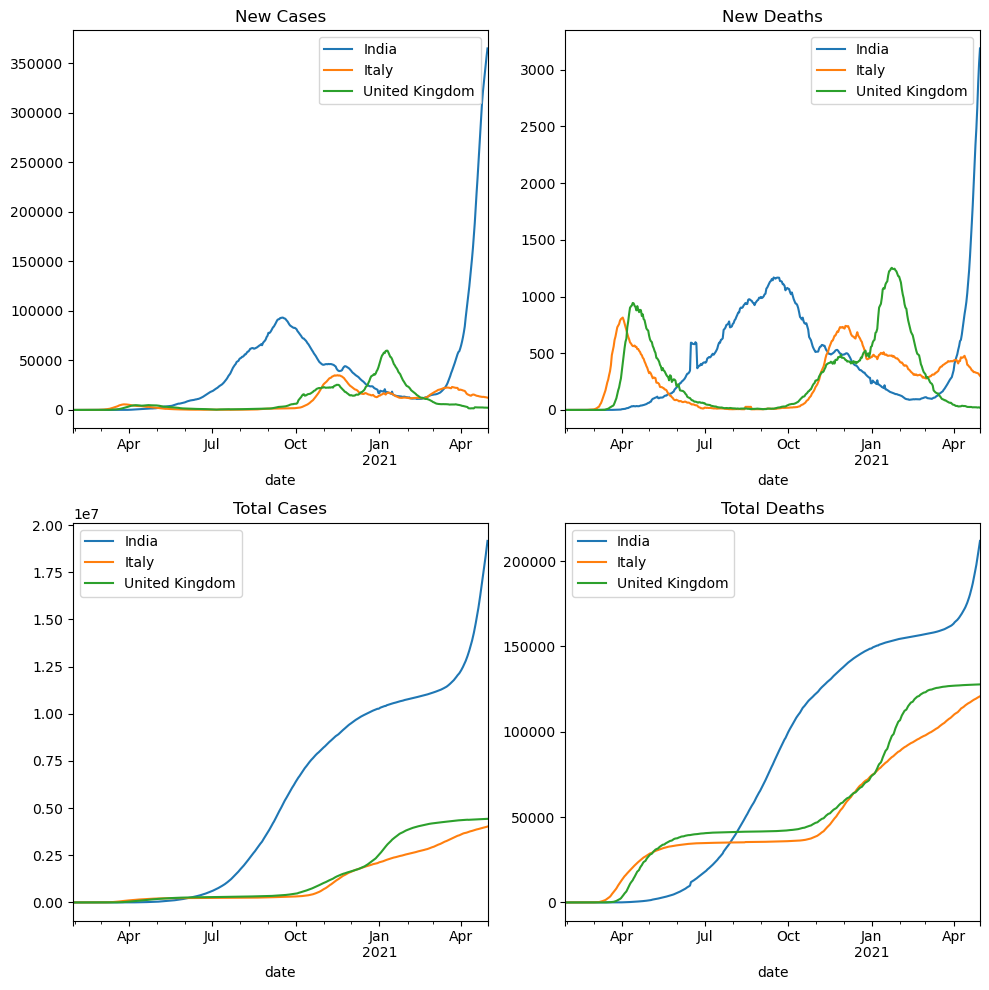

In [31]:
#Plotting the graph to check new cases, new deaths, total cases and total deaths for the three countries
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

df_Countries.groupby('location')['new_cases_smoothed'].plot(ax=axes[0,0], legend=True) 
df_Countries.groupby('location')['new_deaths_smoothed'].plot(ax=axes[0,1], legend=True)
df_Countries.groupby('location')['total_cases'].plot(ax=axes[1,0], legend=True)
df_Countries.groupby('location')['total_deaths'].plot(ax=axes[1,1], legend=True)


axes[0, 0].set_title("New Cases")
axes[0, 1].set_title("New Deaths")
axes[1, 0].set_title("Total Cases")
axes[1, 1].set_title("Total Deaths")

fig.tight_layout()  # adjust subplot parameters to give specified padding.

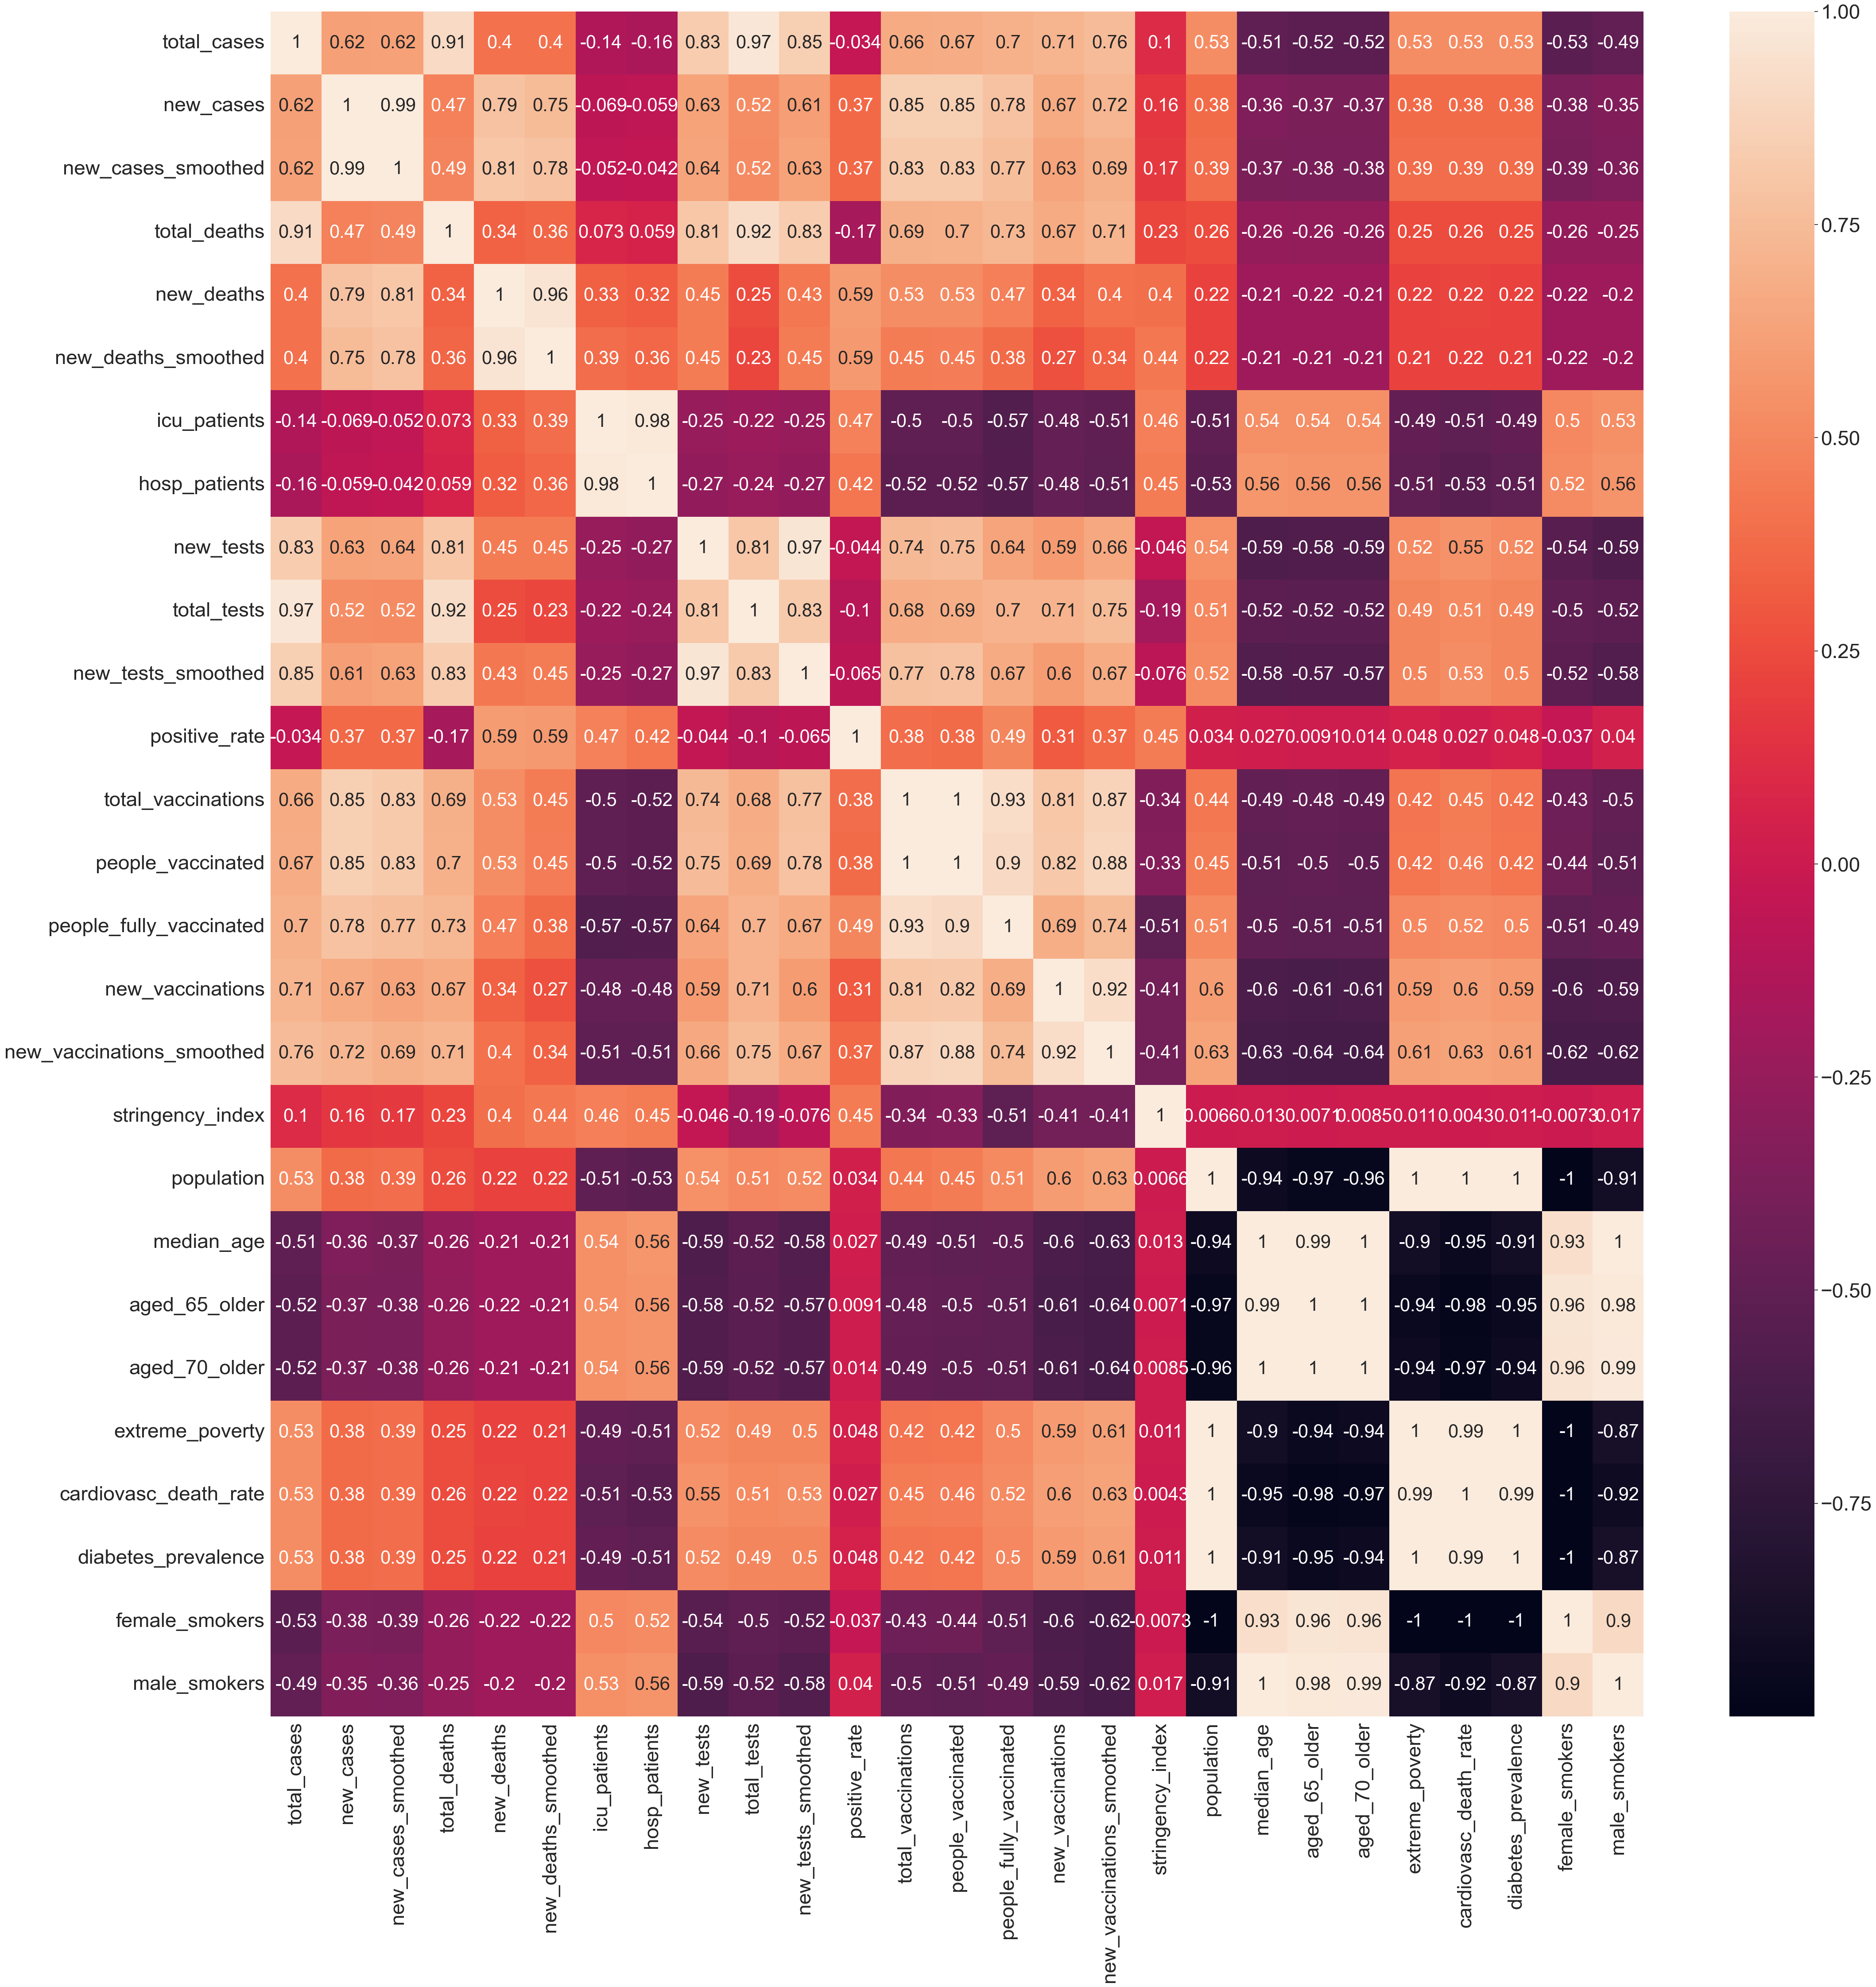

In [37]:
#Plotting the heatmap to check correlation between variables
plt.figure(figsize=(50,50))
sns.heatmap(df_Countries.corr(),annot=True, annot_kws={'size':30})
sns.set(font_scale=4)
plt.show()

In [2]:
#Checking the plot for all countries except China and removing all the other continents that come under the 'location' column, 
#to avoid skewing the algorithm or avoid making it highly biased (China has high number of cases since the beginning of 2020 
#as opposed to other countries)
df_WithoutChina = df.loc[~(df['location'].isin(["China", "World","Asia","Africa","Europe","North America","South America",
                                               "Oceana", "European Union"]))]
df_WithoutChina

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,ZWE,Africa,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85167,ZWE,Africa,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85168,ZWE,Africa,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85169,ZWE,Africa,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [3]:
#Go ahead and drop all unnecessary columns as we did for 'df_countries' and fill na values with zeros where needed
df_WithoutChina.drop(['iso_code', 'continent', 'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',
                  'total_deaths_per_million','new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate',
                  'icu_patients_per_million','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                  'weekly_hosp_admissions','weekly_hosp_admissions_per_million','total_tests_per_thousand','new_tests_per_thousand',
                  'new_tests_smoothed_per_thousand','total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                   'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million','hospital_beds_per_thousand',
                      'tests_per_case', 'population_density','gdp_per_capita', 'life_expectancy','human_development_index',
                      'handwashing_facilities'], axis=1, inplace = True)
df_WithoutChina

C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3038969876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WithoutChina.drop(['iso_code', 'continent', 'total_cases_per_million','new_cases_per_million','new_cases_smoothed_per_million',


,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85167,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85168,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85169,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7


In [38]:
#Reset the index with the date column
#df_WithoutChina.set_index('date', inplace=True)
df_WithoutChina

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85167,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85168,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85169,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,NaN,NaN,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7


In [11]:
#replace null values with 0
#column_list = ['new_cases_smoothed','total_deaths','new_deaths','new_deaths_smoothed']
#df_Countries[column_list].fillna(0, inplace=True)
df_WithoutChina['hosp_patients'].fillna(0, inplace=True)
df_WithoutChina

C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\1832444347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_WithoutChina['hosp_patients'].fillna(0, inplace=True)


,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,...,stringency_index,population,median_age,aged_65_older,aged_70_older,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers
0,Afghanistan,2020-02-24,1.0,1.0,0.000,0.0,0.0,0.000,0.0,0.0,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
1,Afghanistan,2020-02-25,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
2,Afghanistan,2020-02-26,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
3,Afghanistan,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
4,Afghanistan,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,...,8.33,38928341.0,18.6,2.581,1.337,NaN,597.029,9.59,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,0.0,0.0,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85167,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,0.0,0.0,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85168,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,0.0,0.0,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7
85169,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,0.0,0.0,...,NaN,14862927.0,19.6,2.822,1.882,21.4,307.846,1.82,1.6,30.7


In [12]:
df_WithoutChina.isnull().sum()

location                         0
date                             0
total_cases                      0
new_cases                        0
new_cases_smoothed               0
total_deaths                     0
new_deaths                       0
new_deaths_smoothed              0
icu_patients                     0
hosp_patients                    0
new_tests                    42561
total_tests                  42856
new_tests_smoothed           36881
positive_rate                38602
tests_units                  35429
total_vaccinations           73081
people_vaccinated            73659
people_fully_vaccinated      75875
new_vaccinations             74473
new_vaccinations_smoothed    67458
stringency_index              9760
population                     549
median_age                    5730
aged_65_older                 6606
aged_70_older                 6160
extreme_poverty              29987
cardiovasc_death_rate         4802
diabetes_prevalence           3657
female_smokers      

In [13]:
#For better observation, group them by countries and check only for total cases and total deaths 
df_WithoutChina = pd.DataFrame(df_WithoutChina.groupby(['location', 'date'])['total_cases', 'total_deaths'].sum()).reset_index()
df_WithoutChina

C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\1763956633.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_WithoutChina = pd.DataFrame(df_WithoutChina.groupby(['location', 'date'])['total_cases', 'total_deaths'].sum()).reset_index()


,location,date,total_cases,total_deaths
0,Afghanistan,2020-02-24,1.0,0.0
1,Afghanistan,2020-02-25,1.0,0.0
2,Afghanistan,2020-02-26,1.0,0.0
3,Afghanistan,2020-02-27,1.0,0.0
4,Afghanistan,2020-02-28,1.0,0.0
...,...,...,...,...
81501,Zimbabwe,2021-04-26,38102.0,1560.0
81502,Zimbabwe,2021-04-27,38164.0,1565.0
81503,Zimbabwe,2021-04-28,38191.0,1565.0
81504,Zimbabwe,2021-04-29,38235.0,1567.0


In [14]:
#arrange the total cases and total deaths in descending order to make it easier to interpret on plots
df_WithoutChina = df_WithoutChina.sort_values(by = ['location','date'], ascending=False)
print(df_WithoutChina)

          location       date  total_cases  total_deaths
81505     Zimbabwe 2021-04-30      38257.0        1567.0
81504     Zimbabwe 2021-04-29      38235.0        1567.0
81503     Zimbabwe 2021-04-28      38191.0        1565.0
81502     Zimbabwe 2021-04-27      38164.0        1565.0
81501     Zimbabwe 2021-04-26      38102.0        1560.0
...            ...        ...          ...           ...
4      Afghanistan 2020-02-28          1.0           0.0
3      Afghanistan 2020-02-27          1.0           0.0
2      Afghanistan 2020-02-26          1.0           0.0
1      Afghanistan 2020-02-25          1.0           0.0
0      Afghanistan 2020-02-24          1.0           0.0

[81506 rows x 4 columns]


In [15]:
# Define a function to display a bar plot for the total cases and deaths for the top 10 countries
import seaborn as sns
import matplotlib.pyplot as plt
def bar_plot(feature, value, title, data, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,size))
    data = data.sort_values([value], ascending=False).reset_index(drop=True)
    g = sns.barplot(data[feature][0:10], data[value][0:10], palette='Set3')
    g.set_title("Number of {} - highest 10 values".format(title))
#    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.show()    

C:\Users\vinit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


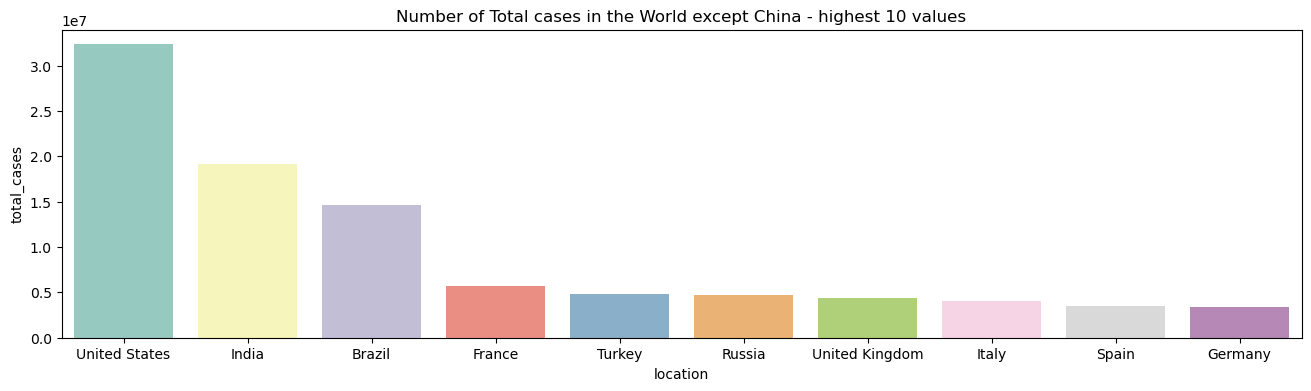

C:\Users\vinit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


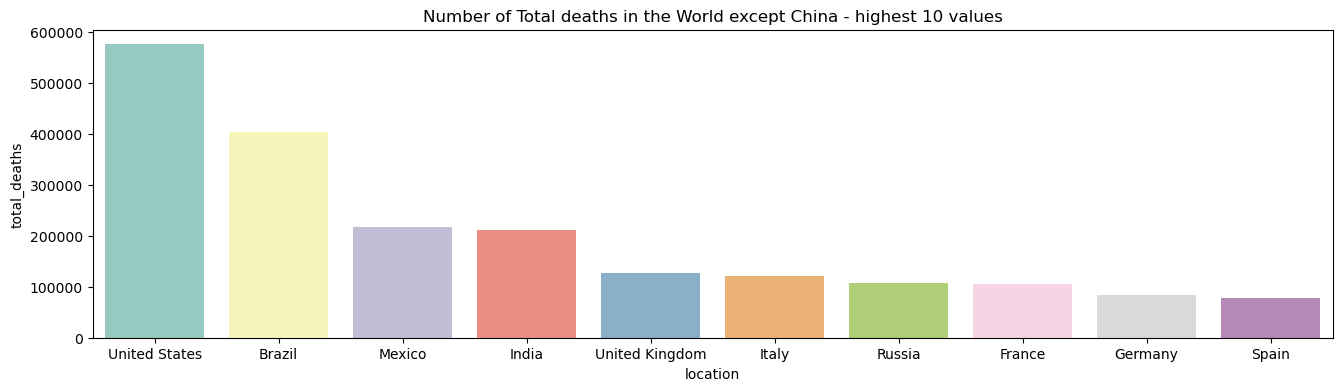

In [16]:
#remove duplicates if any
df_WithoutChina_Filtered = df_WithoutChina.drop_duplicates(subset = ['location'], keep='first')
bar_plot('location', 'total_cases', 'Total cases in the World except China', df_WithoutChina_Filtered, size = 4)
bar_plot('location', 'total_deaths', 'Total deaths in the World except China', df_WithoutChina_Filtered, size = 4)

In [17]:
#Plotting the total cases and total deaths in the world
def plot_world_casesndeaths(data, title='Overall cases and deaths', size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="date", y='total_cases', data=data, color='green', label='Total Cases')
    g = sns.lineplot(x="date", y='total_deaths', data=data, color='orange', label='Total Deaths')
    plt.xlabel('date')
    plt.ylabel(f'Total {title}')
    plt.xticks(rotation=90)
    plt.title(f'Total {title}')
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

In [18]:
#Group by dates to plot aggregate values from all countries per given date. 
#Reset the index because groupby statement makes grouped columns indices by default

df_WithoutChina_total = df_WithoutChina.groupby(['date']).sum().reset_index()
print(df_WithoutChina_total)

          date  total_cases  total_deaths
0   2020-01-01          0.0           0.0
1   2020-01-02          0.0           0.0
2   2020-01-03          0.0           0.0
3   2020-01-04          0.0           0.0
4   2020-01-05          0.0           0.0
..         ...          ...           ...
481 2021-04-26  147813299.0     3116668.0
482 2021-04-27  148657788.0     3131155.0
483 2021-04-28  149563862.0     3146876.0
484 2021-04-29  150461548.0     3161866.0
485 2021-04-30  151340556.0     3176439.0

[486 rows x 3 columns]


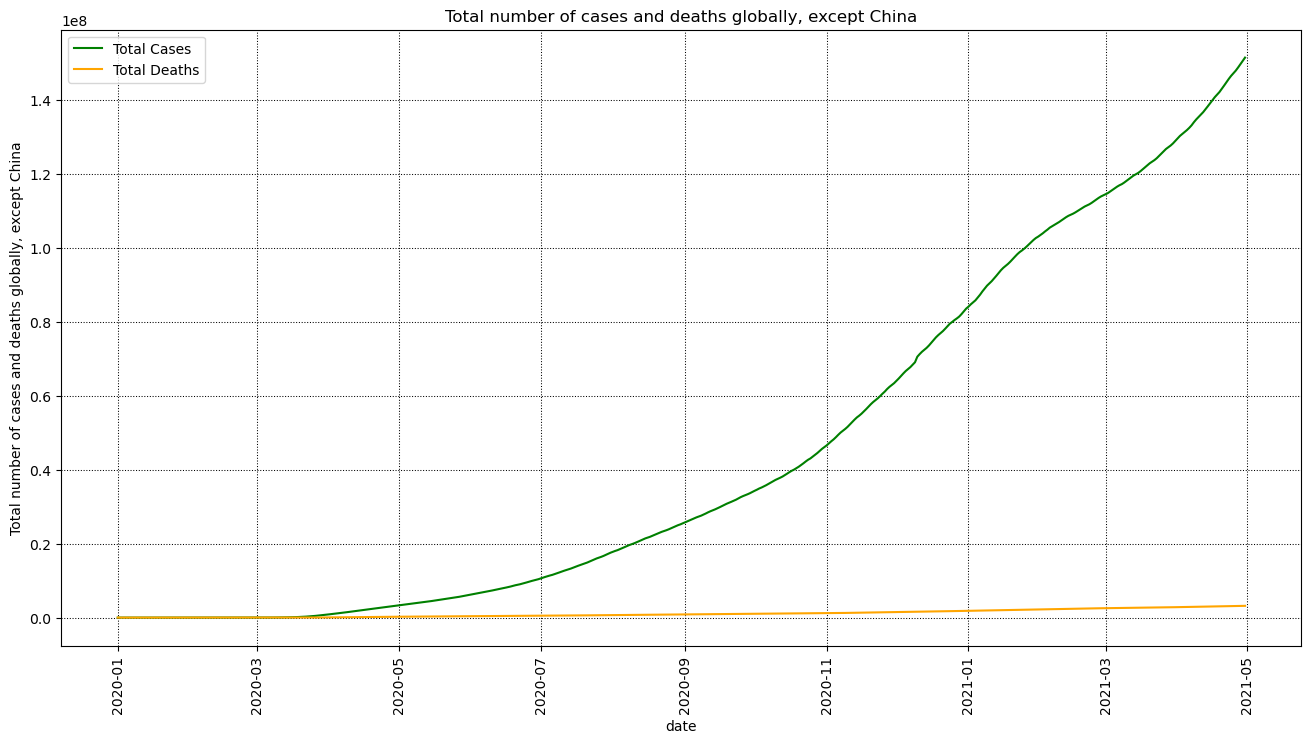

In [19]:
plot_world_casesndeaths(df_WithoutChina_total, 'number of cases and deaths globally, except China', size=4)

In [20]:
#Plotting the graph for total number of cases and deaths for selected countries
def totalcasesndeaths_countries(data, countries, case_type='total_cases', size=2,is_log=True):
    f, ax = plt.subplots(1,1, figsize=(4*size, 3*size))
    for country in countries:
        data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')] 
        g = sns.lineplot(x="date", y=case_type, data=data1,  label=country)  
        ax.text(max(data1['date']), max(data1[case_type]), str(country))
    plt.xlabel('date')
    plt.ylabel(f' {case_type} ')
    plt.title(f' {case_type} ')
    plt.xticks(rotation=90)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match D

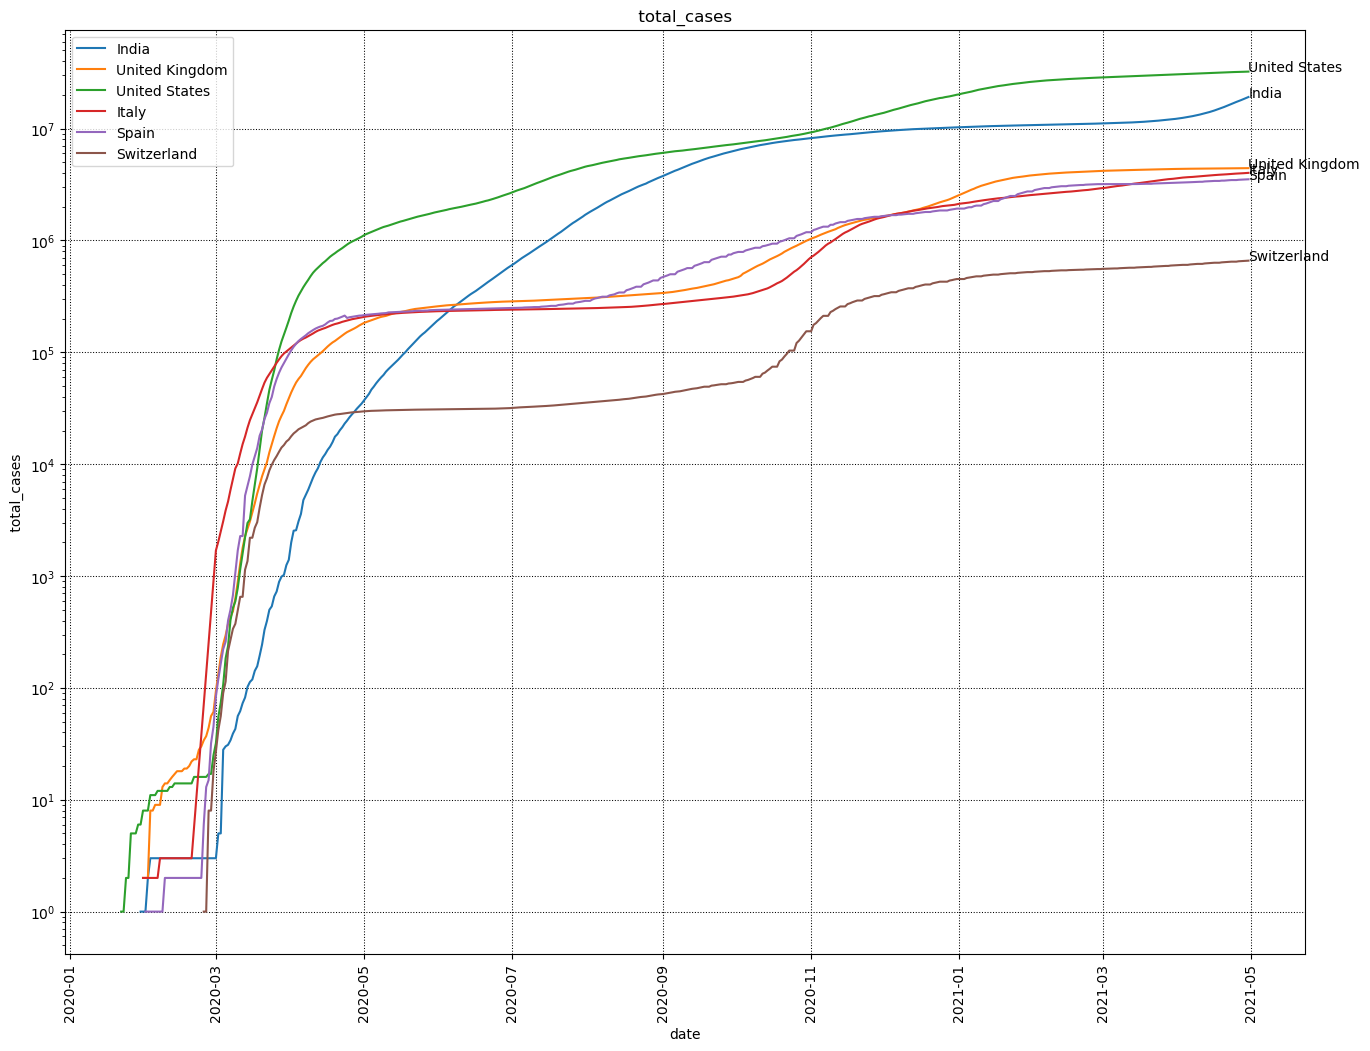

In [21]:
df_country_total = df_WithoutChina.groupby(['location', 'date']).sum().reset_index()

countries = [ "India", "United Kingdom", "United States", "Italy", "Spain", "Switzerland"]

totalcasesndeaths_countries(df_country_total, countries, case_type = 'total_cases', size=4)    

C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1 = data[(data['location']==country) & (df['date'] > '2020-02-15')]
C:\Users\vinit\AppData\Local\Temp\ipykernel_171180\3278785447.py:5: UserWarning: Boolean Series key will be reindexed to match D

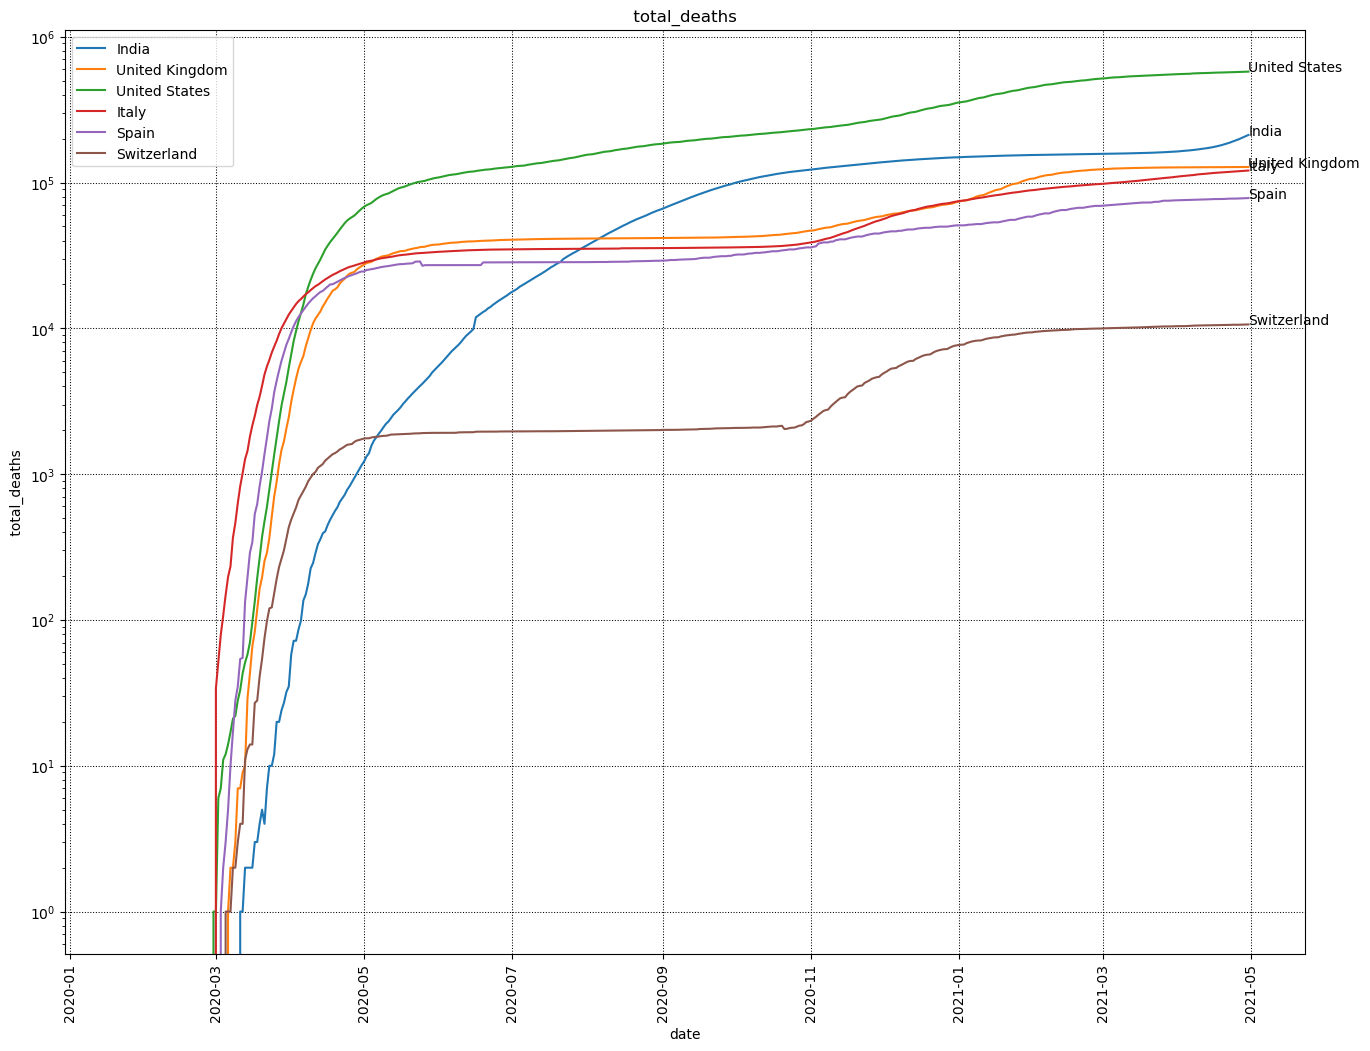

In [22]:
totalcasesndeaths_countries(df_country_total, countries, case_type = 'total_deaths', size=4)

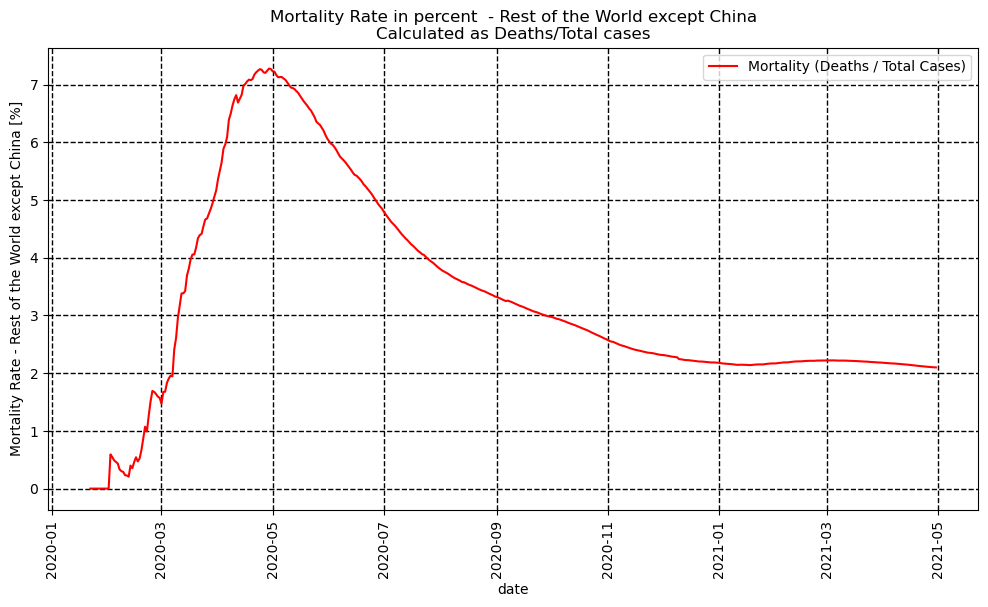

In [23]:
#If we want to see the overall mortality rate

def MortalityRate(data, title='Overall Mortality Rate', size=2):
    f, ax = plt.subplots(1,1, figsize=(4*size,2*size))
    g = sns.lineplot(x="date", y='Mortality (Total Deaths/ Total Cases)', data=data, color='red', 
                     label='Mortality (Deaths / Total Cases)')
    plt.xlabel('date')
    plt.ylabel(f'Mortality Rate{title} [%]')
    plt.xticks(rotation=90)
    plt.title(f'Mortality Rate in percent {title}\nCalculated as Deaths/Total cases')
    ax.grid(color='black', linestyle='dashed', linewidth=1)
    plt.show()  

df_WithoutChina_total['Mortality (Total Deaths/ Total Cases)'] = df_WithoutChina_total['total_deaths'] / df_WithoutChina_total['total_cases'] * 100
MortalityRate(df_WithoutChina_total, title = ' - Rest of the World except China', size = 3)

PREDICTING COVID CASES IN THE NEAR FUTURE:

In [40]:
import scipy as sc
import numpy as np

def exponent_plot(date_df, title, test_data):
    date_df = date_df.sort_values(by=['date'], ascending=True)
    date_df['x'] = np.arange(len(date_df)) + 1  #Add column x to the dataframe 
    date_df['y'] = date_df['total_cases']   #Add column y to the dataframe 

    x = date_df['x'][:-test_data]  #Remove data points from the test_set and use the rest for modelling (so we can predict the 
    #test set against the remaining set later)
    y = date_df['y'][:-test_data]  #Remove data points from the test_set and use the rest for modelling (so we can predict the 
    #test set against the remaining set later)

#Using the exponential function to fit data: y = Ae^(Bt)
    
    c2 = sc.optimize.curve_fit(lambda t, a, b: a*np.exp(b*t),  x,  y,  p0=(25, 0.5)) 
# Function: lambda t, a, b: a*np.exp(b*t)
# xm y and po for initial values. 
    
    A, B = c2[0]  #Coefficients
    print(f'(y = Ae^(Bx)) A: {A}, B: {B}\n')
    x = range(1,date_df.shape[0] + 1)
    y_fit = A * np.exp(B * x)
#    print(y_fit)
    f, ax = plt.subplots(1,1, figsize=(12,6))
    g = sns.scatterplot(x=date_df['x'][:-test_data], y=date_df['y'][:-test_data], label='Confirmed cases (used for model creation)', color='red')
    g = sns.scatterplot(x=date_df['x'][-test_data:], y=date_df['y'][-test_data:], label='Confirmed cases (not used for model, validation)', color='blue')
    g = sns.lineplot(x=x, y=y_fit, label='Predicted values', color='green')  #Predicted
    x_future=range(400,410) #As of 24 March 2020 taking 400 days of info till May 2021, and predicting the next 10 days of cases. 
    y_future=A * np.exp(B * x_future)
    print("Expected cases for the next 10 days: \n", y_future)
    plt.xlabel('Days since first case')
    plt.ylabel(f'Total cases')
    plt.title(f'Confirmed cases & projected cases: {title}')
    plt.xticks(rotation=90)
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

In [41]:
df_India = df_WithoutChina[df_WithoutChina['location']=='India']
df_Italy = df_WithoutChina[df_WithoutChina['location']=='Italy']
df_UK = df_WithoutChina[df_WithoutChina['location']=='United Kingdom']

(y = Ae^(Bx)) A: 6.732629480437897e-13, B: 0.49999999926813643

Expected cases for the next 10 days: 
 [4.86497898e+74 8.02099432e+74 1.32243839e+75 2.18033231e+75
 3.59476025e+75 5.92675768e+75 9.77157145e+75 1.61105977e+76
 2.65618851e+76 4.37931448e+76]


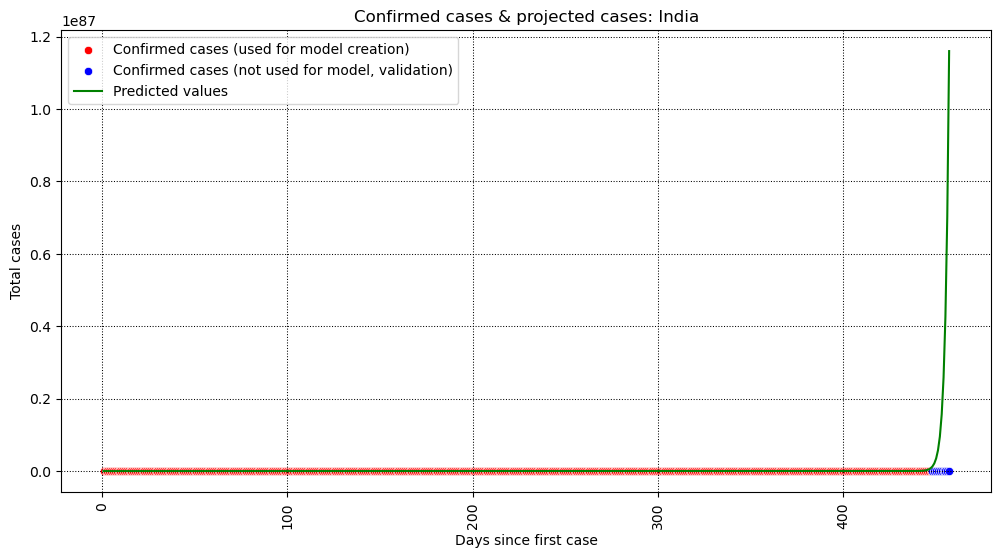

In [42]:
date_df = df_India.copy()
exponent_plot(date_df, 'India', 10)

(y = Ae^(Bx)) A: -1.2042410559682474e-14, B: 0.499999999950959

Expected cases for the next 10 days: 
 [-8.70181411e+72 -1.43468660e+73 -2.36539832e+73 -3.89988252e+73
 -6.42981926e+73 -1.06009798e+74 -1.74780609e+74 -2.88164507e+74
 -4.75102952e+74 -7.83312343e+74]


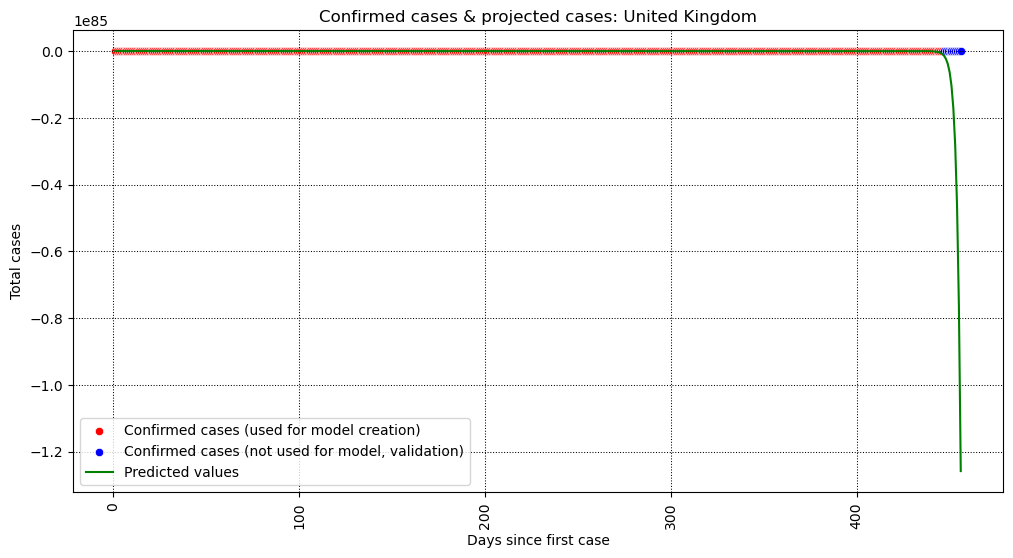

In [43]:
date_df = df_UK.copy()
exponent_plot(date_df, 'United Kingdom', 10)

(y = Ae^(Bx)) A: -1.2042410559682474e-14, B: 0.499999999950959

Expected cases for the next 10 days: 
 [-8.70181411e+72 -1.43468660e+73 -2.36539832e+73 -3.89988252e+73
 -6.42981926e+73 -1.06009798e+74 -1.74780609e+74 -2.88164507e+74
 -4.75102952e+74 -7.83312343e+74]


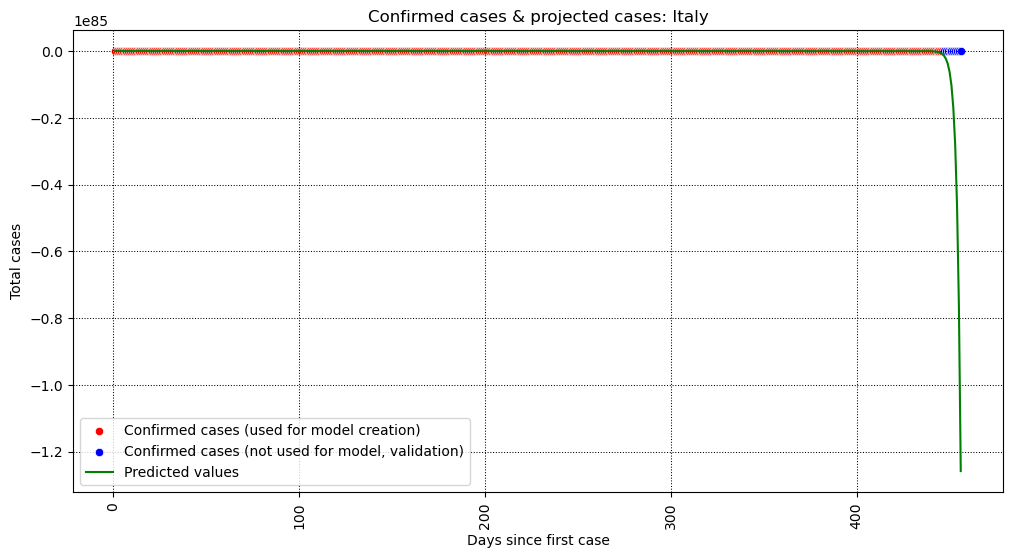

In [44]:
date_df = df_Italy.copy()
exponent_plot(date_df, 'Italy', 10)